# Text
Esta es la variable más compleja. Analizaremos los textos de los tweets desde distintas perspectivas: cantidad de caracteres, cantidad de palabras, y luego separaremos los textos en palabras individuales para buscar correlaciones entre ellas y con otras variables.
Añadimos la columna 'caracteres' para registrar la cantidad de ellos en cada tweet, y la columna 'palabras' para indicar la longitud en cantidad de ellas de cada tweet.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats.mstats as sp
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')

In [4]:
# Añadimos la variable 'caracteres' para registrar la cantidad de ellos en cada tweet.
train['caracteres'] = train['text'].str.len()
train.sort_values(by='caracteres', inplace=True)

# Añadimos la columna 'palabras' para indicar la longitud en cantidad de ellas de cada tweet.
train_split = train['text'].str.split()
train['palabras'] = [len(x) for x in train_split]

La siguiente tabla muestra los primeros y últimos 5 registros del set train.

In [5]:
train

,id,keyword,location,text,target,caracteres,palabras
4890,6962,massacre,NaN,Bad day,0,7,2
5115,7295,nuclear%20reactor,NaN,Err:509,0,7,1
1882,2703,crushed,NaN,Crushed,0,7,1
24,36,NaN,NaN,LOOOOOOL,0,8,1
3670,5224,fatality,Rafael castillo,fatality,0,8,1
...,...,...,...,...,...,...,...
633,915,bioterrorism,NaN,@HowardU If 90BLKs&amp;8WHTs colluded 2 take W...,1,150,22
635,919,bioterrorism,NaN,@cspanwj If 90BLKs&amp;8WHTs colluded 2 take W...,1,150,22
614,885,bioterrorism,NaN,@CAgov If 90BLKs&amp;8WHTs colluded 2 take WHT...,1,151,22
4801,6833,loud%20bang,london essex england uk,It's was about 2:30 in the morning&amp;I went ...,0,152,23


# Largo (caracteres) vs Target
Las siguiente tablamuestra un resumen estadístico de la cantidad de caracteres. 

In [8]:
train['caracteres'].describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: caracteres, dtype: float64

Para analizarlo más en detalle, graficamos las distribuciones en función del target.

Text(0.5, 0.98, 'CARACTERES vs TARGET')

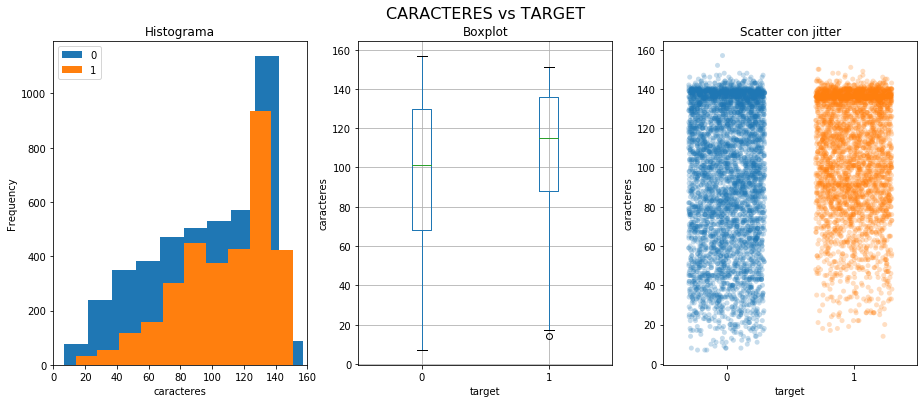

In [11]:
grouped = train.groupby(['target'])

fig = plt.figure()

ax1 = fig.add_subplot(131)
grouped['caracteres'].plot(
    kind='hist', title='Histograma', legend=True, xlim=(0, 160), figsize=(15,6))
ax1.set_xlabel('caracteres')

ax2 = fig.add_subplot(132)
train.boxplot(
    by='target', column='caracteres', ax=ax2)#, figsize=(10,6))
ax2.set_title('Boxplot')
ax2.set_xlabel('target')
ax2.set_ylabel('caracteres')

ax3 = fig.add_subplot(133)
sns.stripplot(x='target', y='caracteres', data=train, alpha=0.25, jitter=0.3)
ax3.set_title('Scatter con jitter')

fig.suptitle('CARACTERES vs TARGET', fontsize=16)

Las distribucion son similares, con una moda cerca de los 140 caracreres, límite histórico de twitter. Sin embargo, parece haber cierta tendencia a que los tweets asociados a desastres tengan una mayor longitud en caracteres, aunque es dudoso que exista diferencia significativa estadísticamente, al menos con este tamaño de muestra. Ahora realizaremos el mismo tipo de análisis con el largo en palabras.
# Largo (palabras) vs Target.
Las siguiente tablamuestra un resumen estadístico de la cantidad de palabras por tuit. 

In [12]:
train['palabras'].describe()

count    7613.000000
mean       14.903586
std         5.732604
min         1.000000
25%        11.000000
50%        15.000000
75%        19.000000
max        31.000000
Name: palabras, dtype: float64

Para analizarlo más en detalle, graficamos las distribuciones en función del target.

Text(0.5, 0.98, 'PALABRAS vs TARGET')

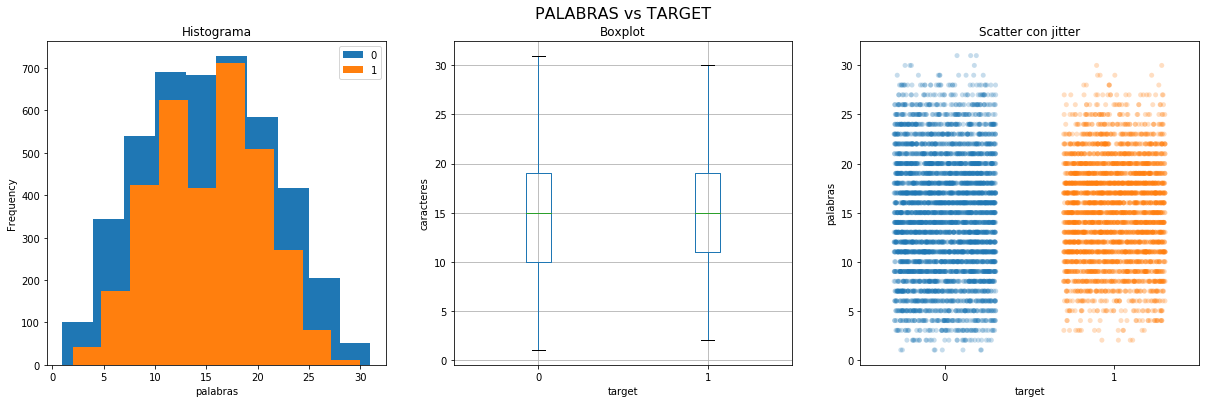

In [15]:
fig = plt.figure()

ax1 = fig.add_subplot(131)
grouped['palabras'].plot(
    kind='hist', title='Histograma', legend=True, figsize=(20,6)) #, xlim=(0, 160)
ax1.set_xlabel('palabras')

ax2 = fig.add_subplot(132)
train.boxplot(
    by='target', column='palabras', ax=ax2)#, figsize=(10,6))
ax2.set_title('Boxplot')
ax2.set_xlabel('target')
ax2.set_ylabel('caracteres')

ax3 = fig.add_subplot(133)
sns.stripplot(x='target', y='palabras', data=train, alpha=0.25, jitter=0.3)
ax3.set_title('Scatter con jitter')

fig.suptitle('PALABRAS vs TARGET', fontsize=16)

En el caso de las palabras, las distribuciónes parecen mán similares, se asemejan a una normal, y se evidencia en el scatter-jitter el carácter discreto de la variable.
Pasaremos a analizar la relación entre palabras individuales de los tuits y el target asociado.
## Palabras dentro de text vs Target
Separaremos el texto de cada tweets en las palabras que lo componen, para analizar con qué frecuenca se utiliza cada palabra.

In [20]:
train['split'] = train['text'].str.split()
train

,id,keyword,location,text,target,caracteres,palabras,split
4890,6962,massacre,NaN,Bad day,0,7,2,"[Bad, day]"
5115,7295,nuclear%20reactor,NaN,Err:509,0,7,1,[Err:509]
1882,2703,crushed,NaN,Crushed,0,7,1,[Crushed]
24,36,NaN,NaN,LOOOOOOL,0,8,1,[LOOOOOOL]
3670,5224,fatality,Rafael castillo,fatality,0,8,1,[fatality]
...,...,...,...,...,...,...,...,...
633,915,bioterrorism,NaN,@HowardU If 90BLKs&amp;8WHTs colluded 2 take W...,1,150,22,"[@HowardU, If, 90BLKs&amp;8WHTs, colluded, 2, ..."
635,919,bioterrorism,NaN,@cspanwj If 90BLKs&amp;8WHTs colluded 2 take W...,1,150,22,"[@cspanwj, If, 90BLKs&amp;8WHTs, colluded, 2, ..."
614,885,bioterrorism,NaN,@CAgov If 90BLKs&amp;8WHTs colluded 2 take WHT...,1,151,22,"[@CAgov, If, 90BLKs&amp;8WHTs, colluded, 2, ta..."
4801,6833,loud%20bang,london essex england uk,It's was about 2:30 in the morning&amp;I went ...,0,152,23,"[It's, was, about, 2:30, in, the, morning&amp;..."


La siguiente tabla muestra los primeros y últimos 5 registros de la separación de la columna text en palabras individuales, junto con el id del tuit original y su target.

In [22]:
# Datafame con id de tweet y palabras separadas
train_split = pd.DataFrame({
    'id': [x for z in train.index for x in [train.loc[z, 'id']] * len(train.loc[z, 'split'])],
    'palabras': [x for z in train.index for x in train.loc[z, 'split']],
    'target': [x for z in train.index for x in [train.loc[z, 'target']] * len(train.loc[z, 'split'])]})

train_split

,id,palabras,target
0,6962,Bad,0
1,6962,day,0
2,7295,Err:509,0
3,2703,Crushed,0
4,36,LOOOOOOL,0
...,...,...,...
113456,1832,GTFO,0
113457,1832,or,0
113458,1832,you,0
113459,1832,get,0


In [27]:
# Contamos cada palabra
train1_split['palabras'].value_counts()

the                2575
a                  1845
to                 1805
in                 1757
of                 1722
                   ... 
'Cooler               1
RI                    1
tale                  1
@freefromwolves       1
Komen                 1
Name: palabras, Length: 31924, dtype: int64

Son más de 30000 palabras, y desde ya preposiciones, artículos, pronombres, conjunciones y algunos verbos de uso corriente se encuentran entre las más usadas. Recién al final del top 60 encnotramos una palabra que pueda estar relacionada directamente con un evento poco feliz (fire). Entre las menos frecuentes, encontramos términos de uso poco común, y caracateres especiales. Es necesario hacer una limpieza de los términos más comunes y poco específicos, de ciertos caracteres especiales, y pasar todos los términos a minúsculas, cosa que dejaremos para el TP 2.

Organizamos los datos tal como lo hicimos con las keywords en la siguiente tabla.

In [23]:
tg = train_split.groupby('target')
tg_unstack = tg['palabras'].value_counts().unstack().T.fillna(0)
tg_unstack['0+1'] = tg_unstack[0] + tg_unstack[1]
tg_unstack['delta/suma'] = (tg_unstack[1] - tg_unstack[0]) / (tg_unstack[1] + tg_unstack[0])
tg_unstack.sort_values(by='delta/suma', inplace=True, ascending=False)
tg_unstack

target,0,1,0+1,delta/suma
palabras,,,,
a.m.,0.0,1.0,1.0,1.0
area...,0.0,2.0,2.0,1.0
annihilate,0.0,1.0,1.0,1.0
annihilating,0.0,1.0,1.0,1.0
announced,0.0,2.0,2.0,1.0
...,...,...,...,...
@CortneyMo_,1.0,0.0,1.0,-1.0
@CortezEra,1.0,0.0,1.0,-1.0
Percent,2.0,0.0,2.0,-1.0


Las palabras quedan entonces como índices. Para cada una de ellas se denota, en las primeras dos columnas, la cantidad de registros en que están asociadas con valores de target iguales a 0 ó 1. En la tercera columna se suman los valores de la primera y la segunda (total de apariciones de cada palabra). En la cuarta calculamos un índice de la asociación de cada palabra con target = 0 (t0) ó target = 1 (t1): (t1 - t0) / (t1 + t0). Cuanto más cercano a 1, más asociada está la palabra a un evento real, cuanto más cercano a -1, más asociada a uno ficticio.
Como se trata de más de 30000 palabras, nos quedaremos para generar una visualizaión con las palabras que aparecen más de 10 veces y cuyo delta/suma es mayor que 0.5, haciendo así hincapié en las más asociadas a desastres. Graficamos entonces la tabla anterior, ordenada por delta/suma de manera descendente.

In [38]:
tg_unstack_n = tg_unstack[(tg_unstack['0+1'] > 20) & (tg_unstack['delta/suma']==1)]\
    .sort_values(by=['delta/suma', '0+1'], ascending=False)

Text(0.5, 0, 'delta/suma')

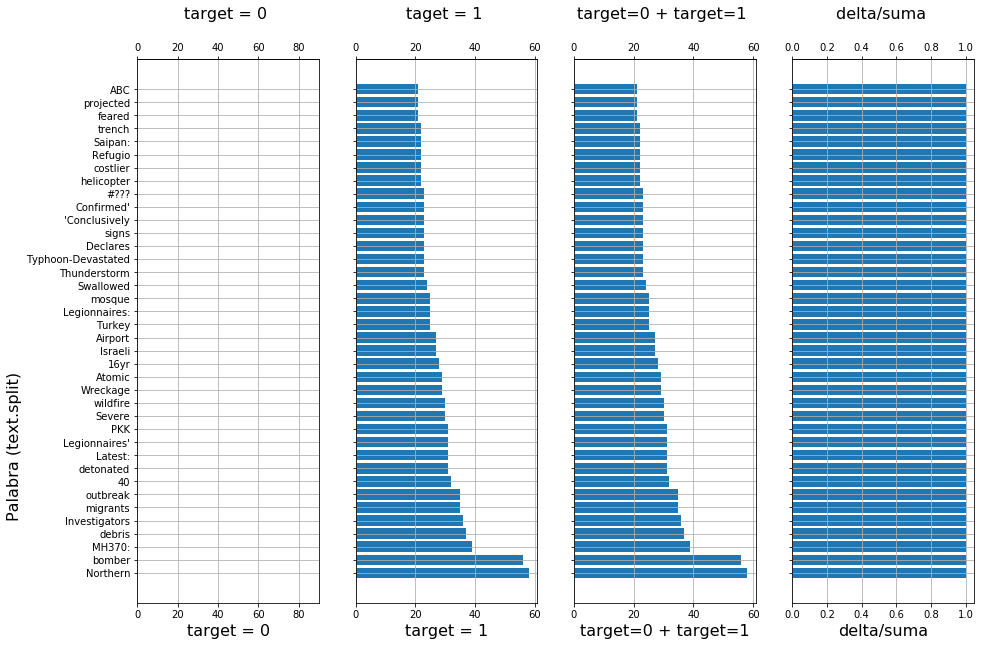

In [42]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(141)
ax1.barh(tg_unstack_n.index, tg_unstack_n[0])
ax1.set_xlim(0,90)
ax1.grid()
ax1.set_title('target = 0 \n', fontsize=16)
ax1.secondary_xaxis('top')
ax1.set_ylabel(('Palabra (text.split)'+' '*45)*1, fontsize=16)
ax1.set_xlabel('target = 0', fontsize=16)

ax2 = fig.add_subplot(142)
ax2.barh(tg_unstack_n.index, tg_unstack_n[1], tick_label='')
ax1.set_xlim(0,90)
ax2.grid()
ax2.set_title('taget = 1 \n', fontsize=16)
ax2.secondary_xaxis('top')
ax2.set_xlabel('target = 1', fontsize=16)

ax3 = fig.add_subplot(143)
ax3.barh(tg_unstack_n.index, tg_unstack_n['0+1'], tick_label='')
ax1.set_xlim(0,90)
ax3.grid()
ax3.set_title('target=0 + target=1 \n', fontsize=16)
ax3.secondary_xaxis('top')
ax3.set_xlabel('target=0 + target=1', fontsize=16)

ax4 = fig.add_subplot(144)
ax4.barh(tg_unstack_n.index, tg_unstack_n['delta/suma'], tick_label='')
ax4.grid()
ax4.set_title('delta/suma \n', fontsize=16)
ax4.secondary_xaxis('top')
ax4.set_xlabel('delta/suma', fontsize=16)

Analzaremos algunos ejemplos. Nuevamente aparece wreckage entre los términos más vinculados con target = 1, como en el análisis de las keywords. El término más frecuentemente asociado a desastre, Northern, lo encontramos junto con California, otro término muy asociado, en gran cantidad de tuits acerca incendio forestal en Northern California:

In [30]:
northern = train[train['text'].str.contains('Northern')]
for z in northern['text'][:20]:
    print(z)

kc5kH mhtw4fnet

Crews gaining on huge Northern California wildfire - CBS News
Arson suspect linked to 30 fires caught in Northern California http://t.co/mmGsyAHDzb
Arson suspect linked to 30 fires caught in Northern California http://t.co/u1fuWrGK5U
Arson suspect linked to 30 fires caught in Northern California http://t.co/EJ2GHNAfHY
The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/6AcSWzo7cw
The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/hCKxJ8eukt
The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/aueZxZA5ak
The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/d1VjOYg52A
The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/lY8x7rqbwN
The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/ZBZc8905Gl
The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/RlPTtkBG4

Los términos Families, 40, outbreak, Legionnaires, todos asociados a eventos desgraciados, los encontramos en esta serie de tuits:: "Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/02ELqLOpFk"

In [31]:
families = train[train['text'].str.contains('Families')]
for z in families['text'][:20]:
    print(z)

GENERAL AUDIENCE: On Wounded Families | ZENIT - The World Seen From Rome http://t.co/hFvnyfT78C
Families to sue over Legionnaires' disease outbreak in Edinburgh - BBC News http://t.co/rM6CNzkSzL
IK Only Troll His Pol Rivals Never Literally Abused Them Or Attacked Their Families. While All Of Them Literally Abuse IK. Loosers
Do you have a plan? Emergency Preparedness for #Families of
Children with Special Needs  http://t.co/RdOVqaUAx5  #autism #specialneeds
Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/81HVV3N3rS
Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/3sNyOOhseq
Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disease in Edinburgh are to ...
Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/2A

In [45]:
#train.loc[train['text'].str.contains(' 40 '), 'text'].to_csv('40.csv', index=False)

### PKK = partido d los trabajadores del Kurdistán

In [32]:
pkk = train[train['text'].str.contains('PKK')]
for z in pkk['text'][:20]:
    print(z)

16yr old PKK suicide bomber who detonated bomb in Turkey Army trench released http://t.co/mGZslZz1wF
16yr old PKK suicide bomber who detonated bomb in Turkey Army trench released http://t.co/5orTB8p51c
16yr old PKK suicide bomber who detonated bomb in Turkey Army trench released http://t.co/n7Yst76ku3
16yr old PKK suicide bomber who detonated bomb in Turkey Army trench released http://t.co/mMkLapX2ok
Pic of 16yr old PKK suicide bomber who detonated bomb in Turkey Army trench released http://t.co/pOL92mn8YZ
Pic of 16yr old PKK suicide bomber who detonated bomb in Turkey Army trench released http://t.co/FVXHoPdf3W
recap/ Pic of 16yr old PKK suicide bomber who detonated bomb in Turkey Army trench released http://t.co/6jzCEdaYRG
.@Vagersedolla visits villages recently bombed by Turkey and finds people fed up with the PKK http://t.co/UUWEiKD7sP
New post: Pic of 16yr old PKK suicide bomber who detonated bomb in Turkey Army trench released http://t.co/LWDcrPEhTN
ll//ll= Pic of 16yr old PKK su

Sería interesante analizar la correlación de a pares en el uso de palabras, pero una matriz de tales dimensiones es difícil de visualizar y analizar, sin antes hacer un filtrado de términos comunes poco específicos y caracteres especiales, cosa que dejamos para el TP 2.